# YOLOv5 Ultralytics

Source:
https://github.com/ultralytics/yolov5

Tutorial:
https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data



# Step 1: Install Requirements

In [ ]:
PROJECT_ROOT = "~/code/school/captcha-solver" #@param {type:"string"}

import os.path

# Go to root of project.
%cd {PROJECT_ROOT}

/content


In [ ]:
# Only clone repo if not already present
if os.path.isdir("yolov5"):
  print ("File exist")
else:
  !git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

File exist
/content/yolov5
Setup complete. Using torch 1.11.0+cu113 (Tesla T4)


In [ ]:
if os.path.isdir( PROJECT_ROOT + "/captcha-solver"):
  print ("File exist")
else:
  !git clone https://github.com/mve/captcha-solver /content/captcha-solver # clone repo

File exist


# Step 2: Assemble Our Dataset


In [ ]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = PROJECT_ROOT + "/datasets"

# Change the following code to switch dataset.

In [ ]:
# after following the link above, recieve python code with these fields filled in
from roboflow import Roboflow
rf = Roboflow(api_key="lpAPGdHq3w2H0vl0cBAu")
project = rf.workspace("captcha-solver").project("captcha-images")
dataset = project.version(37).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/CAPTCHA-images-37 in yolov5pytorch:: 100%|██████████| 2018/2018 [00:01<00:00, 1047.57it/s]


# Step 3: Train Our Custom YOLOv5 model

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** Our dataset locaiton is saved in the `dataset.location`
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- **cache:** cache images for faster training

You can switch weights to any of these pretrained checkpoints:
https://github.com/ultralytics/yolov5#pretrained-checkpoints

# Model info
Tested with 120 epochs, 786 images stretched to 640x640 on a Tesla K80.
- yolov5n6: will take an estimated 1.3 hours
- yolov5s6: will take an estimated 2 hours
- yolov5m6: will take an estimated 5 hours
- yolov5l6: will take an estimated 9 hours
- yolov5x6: Not enough GPU RAM


In [ ]:
model = 'yolov5n6.pt' #@param ["yolov5n6.pt", "yolov5s6.pt", "yolov5m6.pt", "yolov5l6.pt", "yolov5x6.pt"] {allow-input: true}

In [ ]:
# Install wandb for tracking and visualizing YOLOv5 runs.
!pip install wandb

In [ ]:
import wandb
wandb.login()

True

In [ ]:
# --resume wandb-artifact://han-captcha/YOLOv5/1182ptzf
# {model}
# /content/best.pt

In [ ]:
!python train.py --img 800 --batch 8 --epochs 180 --resume wandb-artifact://han-captcha/YOLOv5/1nxb3vjm --data {dataset.location}/data.yaml --hyp {PROJECT_ROOT}/captcha-solver/hyp.yaml --weights {model} --cache --save-period 2

wandb: Currently logged in as: mve (han-captcha). Use `wandb login --relogin` to force relogin
train: weights=yolov5n6.pt, cfg=, data=/content/datasets/CAPTCHA-images-37/data.yaml, hyp=/content/captcha-solver/hyp.yaml, epochs=180, batch_size=8, imgsz=800, rect=False, resume=wandb-artifact://han-captcha/YOLOv5/1nxb3vjm, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=2, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-190-g4d59f65 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, mo

# Evaluate Custom YOLOv5 Detector Performance
Training losses and performance metrics are saved to Tensorboard and also to a logfile.

If you are new to these metrics, the one you want to focus on is `mAP_0.5` - learn more about mean average precision [here](https://blog.roboflow.com/mean-average-precision/).

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [ ]:
# Use newly run weights.
!python detect.py --weights runs/train/exp/weights/best.pt --img 800 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/CAPTCHA-images-37/test/images, data=data/coco128.yaml, imgsz=[800, 800], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-190-g4d59f65 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 280 layers, 3135556 parameters, 0 gradients, 4.4 GFLOPs
image 1/25 /content/datasets/CAPTCHA-images-37/test/images/abamps_jpg.rf.0ac8217717a6cd636ebae2424bc955c3.jpg: 256x832 2 as, 2 bs, 1 m, 1 p, 1 s, Done. (0.030s)
image 2/25 /content/datasets/CAPTCHA-images-37/test/images/acinar_jpg.rf.50350b5b21675dca4161717eb0d9df1b.jpg: 256x832 2 as, 1 c, 1 d, 1 i, 1 n, 1 o, 1 r, 1 s, 1 u, Done. (0

In [ ]:
# Use existing weights.
# !python detect.py --weights /content/long-running.pt --img 800 --conf 0.1 --source {dataset.location}/test/images

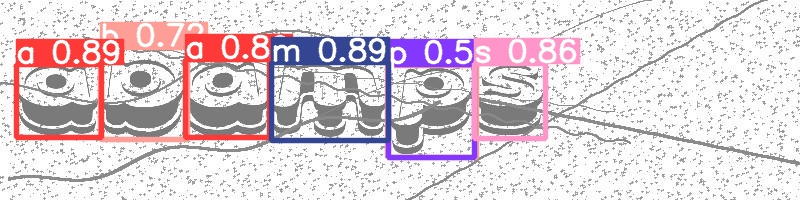

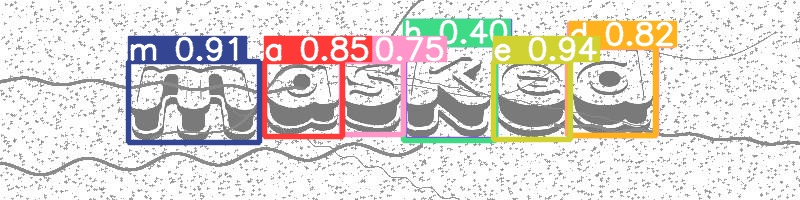

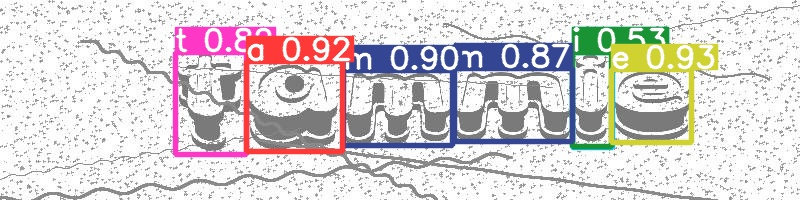

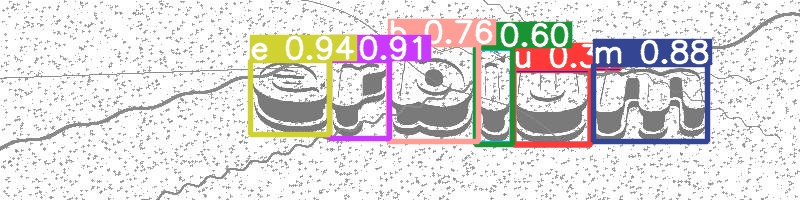

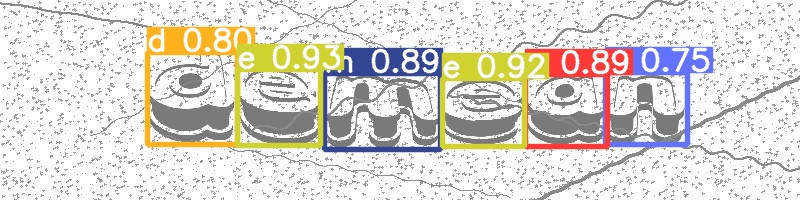

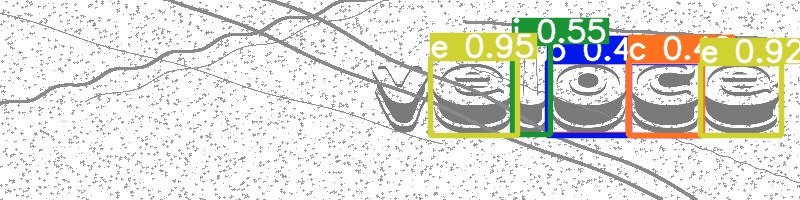

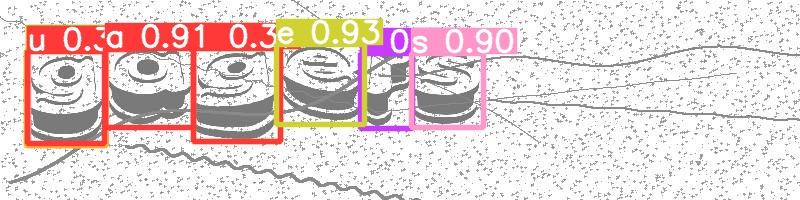

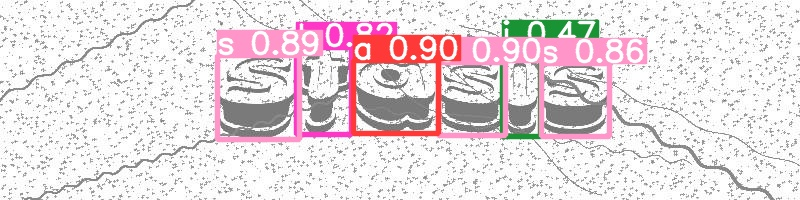

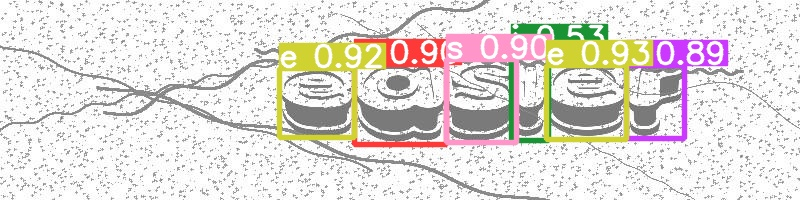

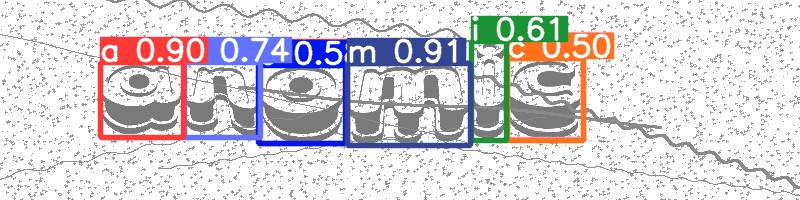

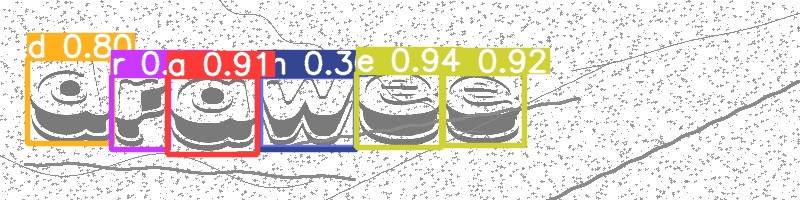

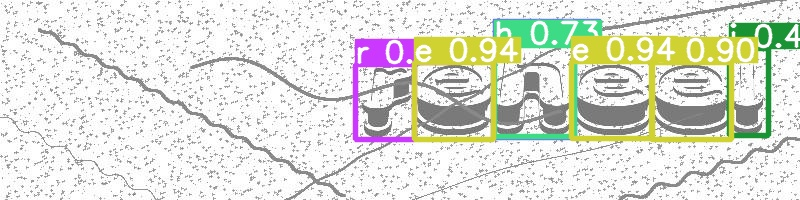

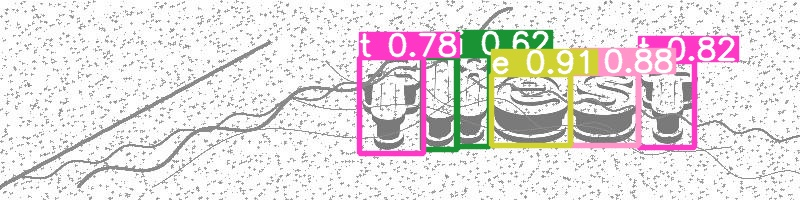

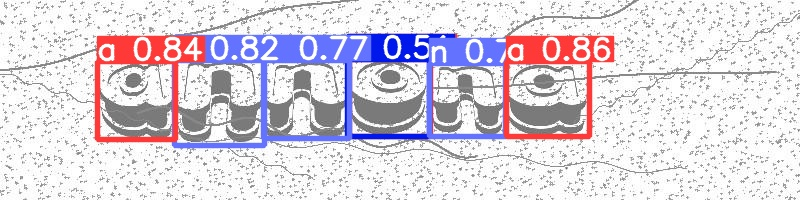

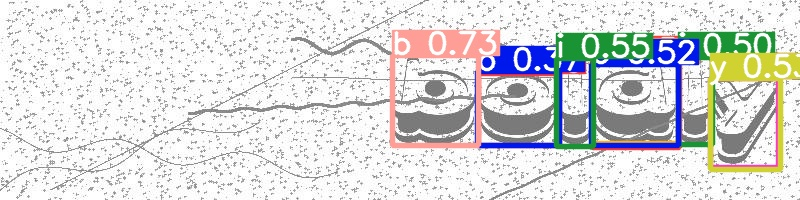

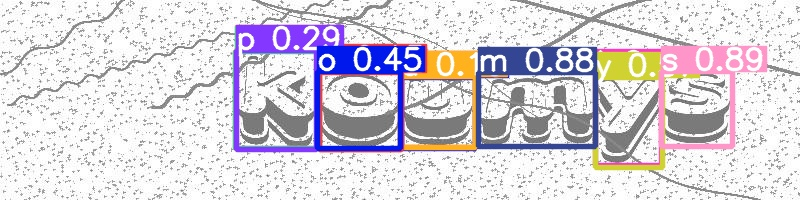

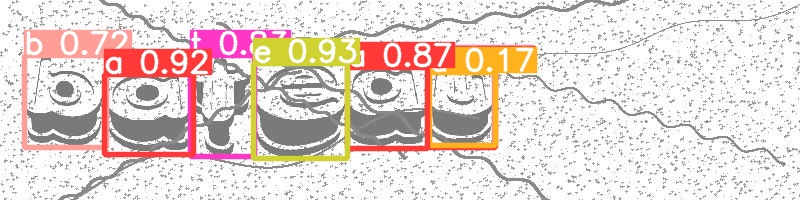

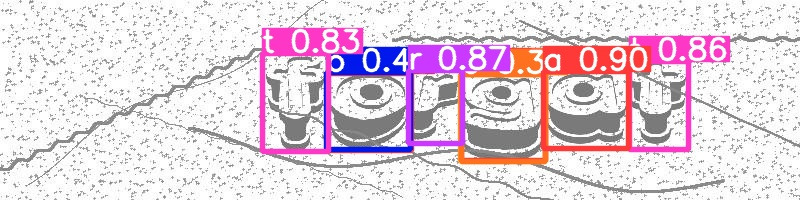

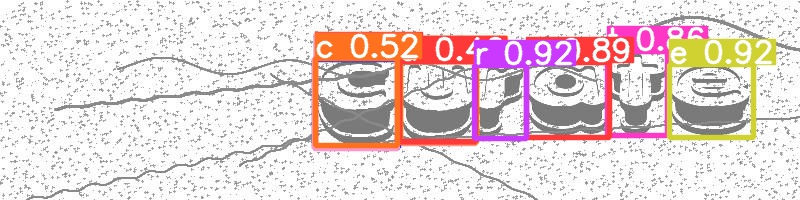

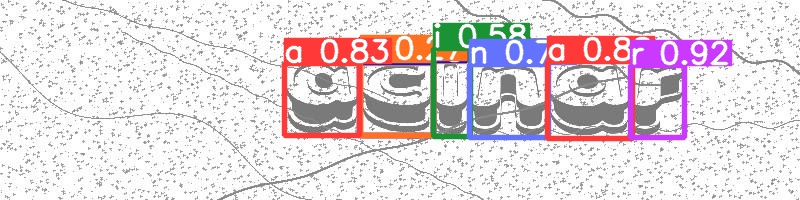

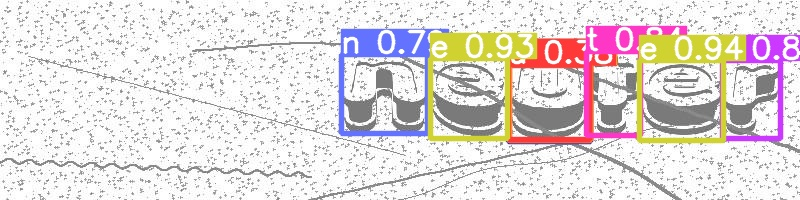

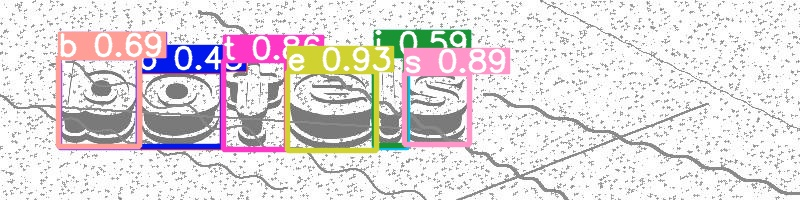

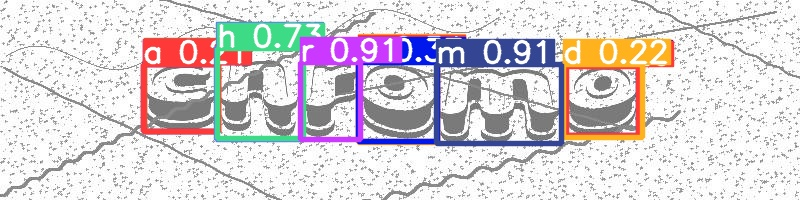

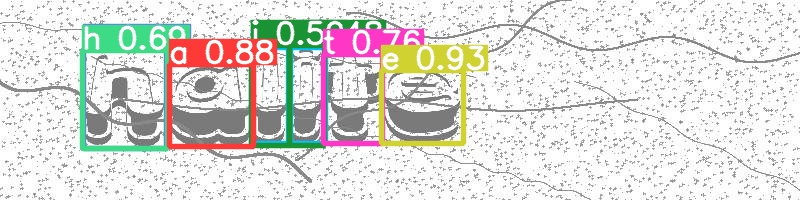

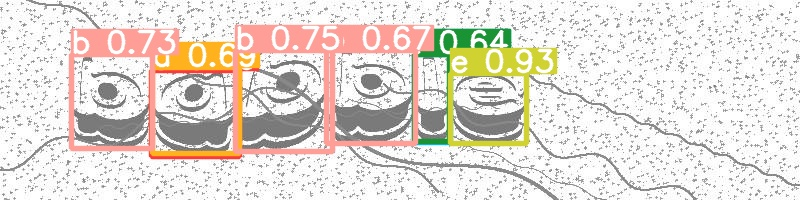

In [ ]:
# display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob(PROJECT_ROOT + '/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
# Export your model's weights for future use
# from google.colab import files
# files.download('./runs/train/exp/weights/best.pt')